In [270]:
#Importing needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  accuracy_score

from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 

In [271]:
#url of dataset
data_url='https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

In [272]:
#getting dataset
df = pd.read_csv(data_url, header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [273]:
# Column names
columns=['buying',
'maint',
'doors',
'persons',
'lug_boot',
'safety',
'class',
]

In [274]:
#getting the data with column names
df=pd.read_csv(data_url,header=None, names=columns)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


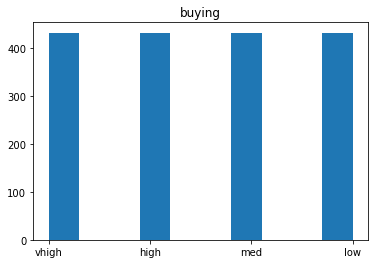

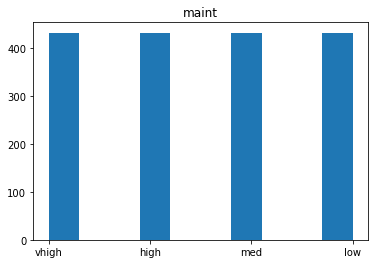

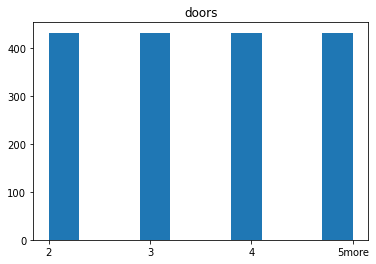

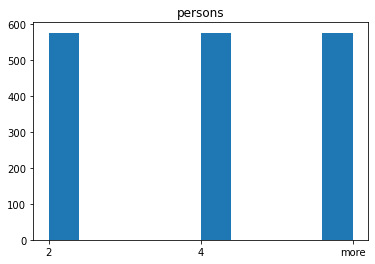

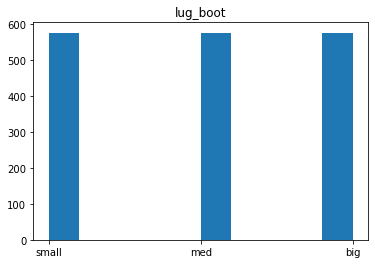

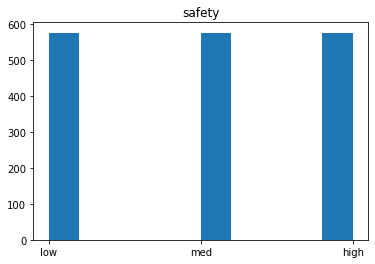

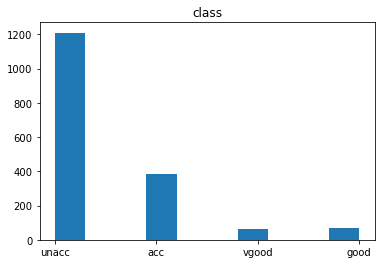

In [275]:
#Getting some insights from the data
for col_name in df.columns:
    plt.figure()
    plt.hist(df[col_name])
    plt.title(col_name)

In [276]:
#checking data types
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [277]:
#Changing dtype of columns to int using LabelEncoder
lb=LabelEncoder()
for i in df.columns:
    df[i]=lb.fit_transform(df[i])


In [278]:
#Looking into data
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [279]:
#checking data types one more time
df.dtypes


buying      int32
maint       int32
doors       int32
persons     int32
lug_boot    int32
safety      int32
class       int32
dtype: object

In [280]:
#Defining Feature and target
X,y=df.drop(['class'], axis=1), df['class']

In [281]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)

In [282]:
#Defining classifier
clf=DecisionTreeClassifier()
#fitting 
clf=clf.fit(X_train,y_train)

In [283]:
#making predictions
pred =clf.predict(X_test)

In [284]:
#Getting Accuracy score
acc = accuracy_score(y_test,pred)
print('Accuracy:',(acc*100).round(),'%')

Accuracy: 95.0 %


In [285]:
df.columns[:6]

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

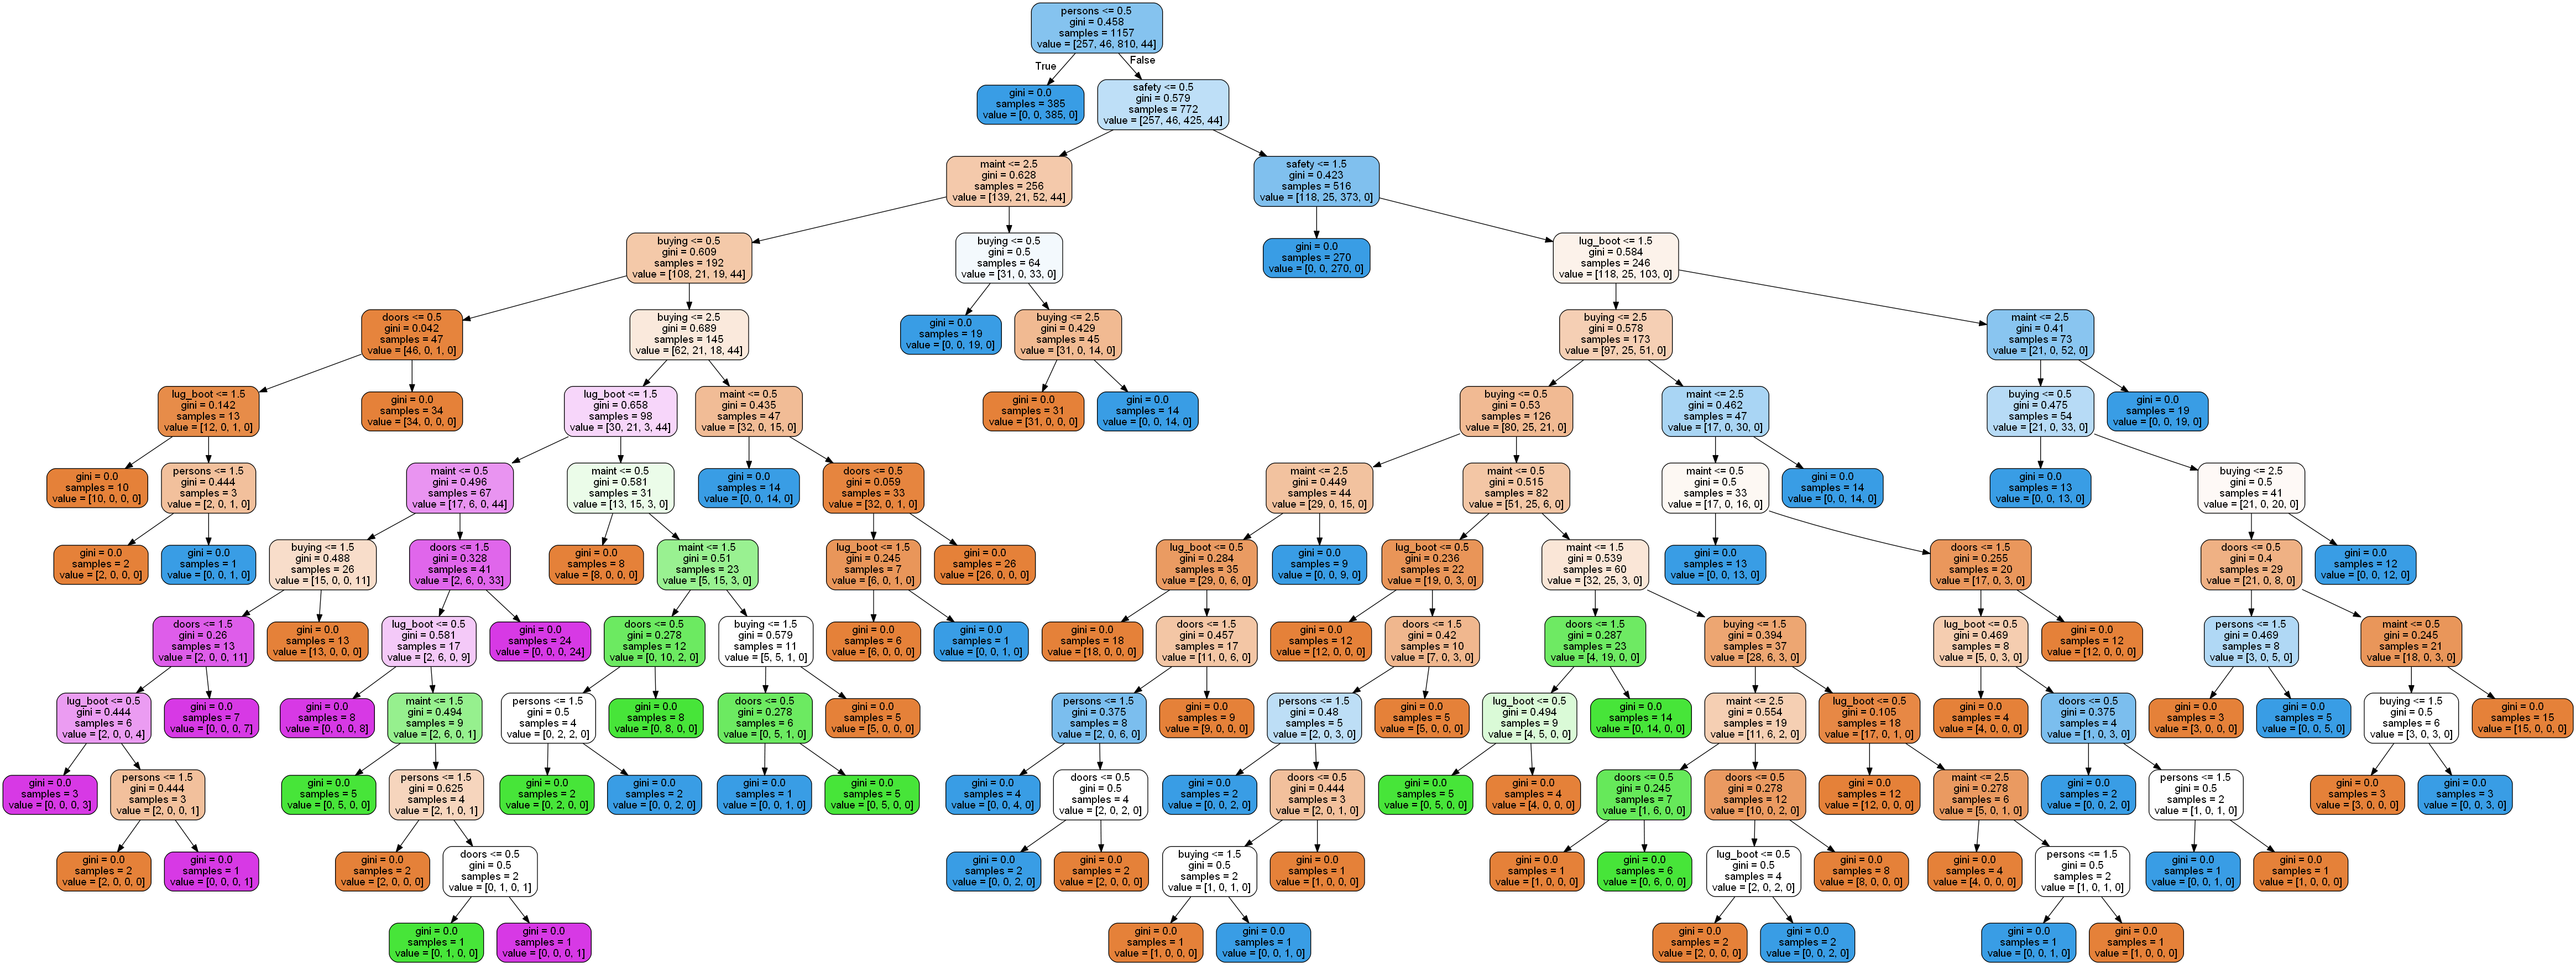

In [286]:
features = list(df.columns[:6])
features

dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

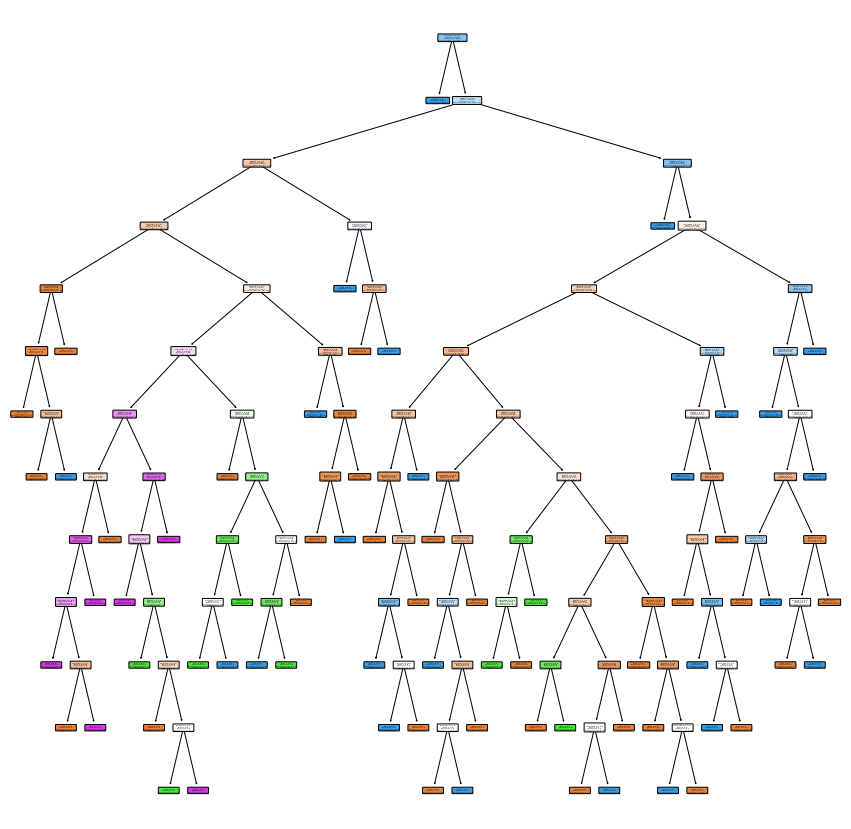

In [287]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['unacc', 'acc', 'good', 'vgood'],
         feature_names=X.columns)
plt.show()

C:\Users\Abubakr\Anaconda3\envs\ai\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


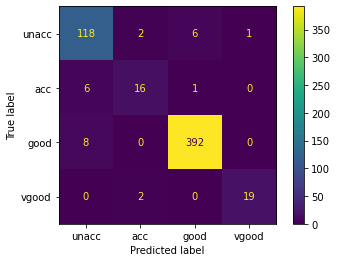

In [288]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, display_labels=['unacc', 'acc', 'good', 'vgood'])